# Zomato Data Analysis

## Step 1 : Import necessory libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 2 : Read file

In [2]:
zomato_data = pd.read_csv("zomato.csv")
zomato_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


- Column Summary :
    - url		                      :       URL link for the restaurant
    - address	                      :       Full address of the restaurant
    - name                            :       Restaurant Name        
    - online_order                    :       It gives the info about is the food ordered online or not
    - book_table                      :       Gives info about is table is pre booked or not
    - rate                            :       Customer ratings
    - votes                           :       How many customers gave the ratings
    - phone                           :       Contact number of the restaurant
    - location                        :       Exact location of the reastaurant
    - rest_type                       :       States the type of the restaurant like (Cafe, Casual dining etc..)
    - dish_liked                      :       Which dish customers most liked
    - cuisines                        :       Variety of food
    - approx_cost(for two people)     :       Cost for two perople
    - reviews_list                    :       Reviews given by customers
    - menu_item                       :       List of items
    - listed_in(type)                 :       Type of the services they provide like (Buffet, Cafe, Delivery etc..) 
    - listed_in(city)                 :       City in which the restaurant is located
    

## Step 3 : Understand the data

#### 1. Shape of the data

In [3]:
print(f'Zomato dataset contains {zomato_data.shape[1]} columns and {zomato_data.shape[0]} records.')


Zomato dataset contains 17 columns and 51717 records.


#### 2. Basic information 

In [4]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### 3. Describe Statistical Info

In [5]:
zomato_data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


## Step 4 : Data Cleaning

#### 1. Check duplicates

In [6]:
zomato_data.duplicated().sum()

0

#### 2. Check unique values

In [7]:
# Checking how many unique values each column have
zomato_data.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

#### 3. Drop unnecessary columns

In [8]:
cols = ['url', 'address', 'phone', 'reviews_list', 'menu_item', 'dish_liked', 'listed_in(city)']
data = zomato_data.drop(columns = cols)
data

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


#### 4. Understand categorical and numerical columns

In [9]:
print(f'List of all columns - \n{data.columns}')

List of all columns - 
Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')


In [10]:
cols = ['rate', 'votes', 'approx_cost(for two people)']

for i in cols:
    print(f'{i} :- \n\t{data[i].unique()}\n\n ')
    print('-'*100)

rate :- 
	['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']

 
----------------------------------------------------------------------------------------------------
votes :- 
	[ 775  787  918 ... 4957 2382  843]

 
----------------------------------------------------------------------------------------------------
approx_cost(for two people) :- 
	['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80

### Analysis based on unique values - 

    1. rate column : It contains numeric data. Convert rate from object to float.
    2. votes column : It is a numeric data. No need to convert.
    3. approx_cost(for two people) : Need to convert to float


- rate column :


In [11]:
# 1. remove unnecessary characters from rate column
data.rate = data.rate.str.split('/').str.get(0)

In [12]:
# 2. We can drop non-numeric values from rate column such as 'NEW' and '-'
data.drop(data[(data['rate'] == 'NEW') | (data['rate'] == '-')].index, inplace=True)

In [13]:
# 3. Convert data type from object to float for rate column
data.rate = data.rate.astype(float)

- approx_cost(for two people)

In [14]:
# 1. In approx_cost(for two people) column, values contains comma so we remove it
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.split().str.get(0).str.replace(',','')


In [15]:
# 2. Convert data type from object to float for approx_cost(for two people) column
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49440 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49440 non-null  object 
 1   online_order                 49440 non-null  object 
 2   book_table                   49440 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        49440 non-null  int64  
 5   location                     49419 non-null  object 
 6   rest_type                    49215 non-null  object 
 7   cuisines                     49395 non-null  object 
 8   approx_cost(for two people)  49099 non-null  float64
 9   listed_in(type)              49440 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.1+ MB


#### 5. Check for outliers and handle them

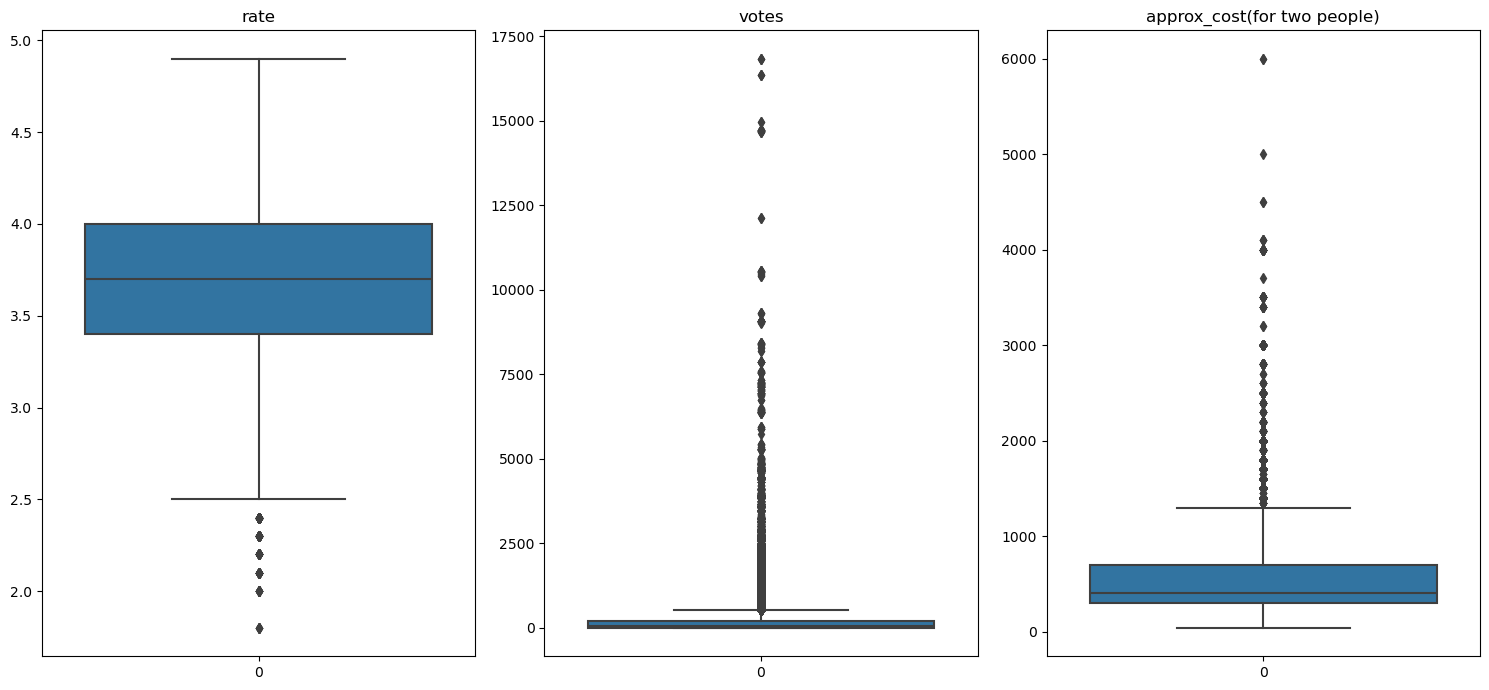

In [17]:
fig = plt.figure(figsize=(15,7))
counter = 1
for i in data.select_dtypes(exclude='object').columns:
    plt.subplot(1,3,counter)
    plt.title(f'{i}')
    sns.boxplot(data[i])
    counter += 1
plt.tight_layout()
plt.show()

In [18]:
data1 = data.select_dtypes(exclude='object')
data1

,rate,votes,approx_cost(for two people)
0,4.1,775,800.0
1,4.1,787,800.0
2,3.8,918,800.0
3,3.7,88,300.0
4,3.8,166,600.0
...,...,...,...
51712,3.6,27,1500.0
51713,NaN,0,600.0
51714,NaN,0,2000.0
51715,4.3,236,2500.0


In [19]:
def LB_UB_Limit(col):
    q1, q3 = data1[col].quantile([.25,.75])
    iqr = q3 - q1
    LB = q1 - 1.5 * iqr
    UB = q3 + 1.5 * iqr
    return LB, UB

def count_outliers(data1):
    for i in data1:
        ls = list(LB_UB_Limit(i))
        df = data1[(data1[i] > ls[1]) | (data1[i] < ls[0])]
        print(f'{i} - {df.shape[0]}')
        
print('Total outliers present in below columns : \n')
count_outliers(data1)

Total outliers present in below columns : 

rate - 187
votes - 6601
approx_cost(for two people) - 3181


In [20]:
outliers_col = ['rate', 'votes', 'approx_cost(for two people)']

In [21]:
ls0 = []
ls1 = []
for i in outliers_col:
    l = list(LB_UB_Limit(i))
    ls0.append(l[0])
    ls1.append(l[1])

In [22]:
df = data

In [23]:
df['rate'] = df['rate'].clip(lower=ls0[0], upper=ls1[0])
df['votes'] = df['votes'].clip(lower=ls0[1], upper=ls1[1])
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].clip(lower=ls0[2], upper=ls1[2])

In [24]:
print('Clipped outliers in below columns : \n')
count_outliers(df.select_dtypes(exclude='object'))

Clipped outliers in below columns : 

rate - 0
votes - 0
approx_cost(for two people) - 0


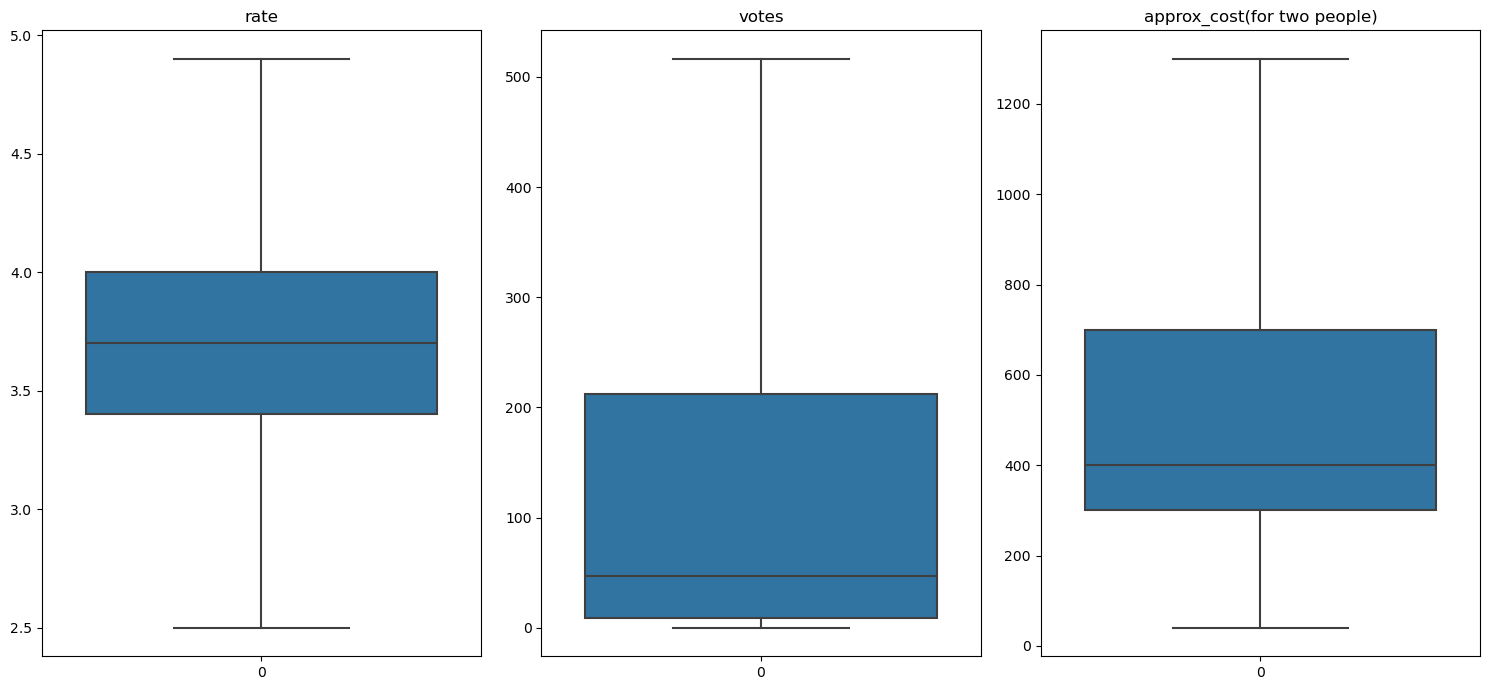

In [25]:
fig = plt.figure(figsize=(15,7))
counter = 1
for i in df.select_dtypes(exclude='object').columns:
    plt.subplot(1,3,counter)
    plt.title(f'{i}')
    sns.boxplot(data[i])
    counter += 1
plt.tight_layout()
plt.show()

 - Handled outliers in rate, votes and approx_cost(for two people) columns

#### 6. Check for null values

In [26]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       225
cuisines                         45
approx_cost(for two people)     341
listed_in(type)                   0
dtype: int64

In [27]:
# 1. Fill null values for rate column
df['rate'] = df['rate'].fillna(df.rate.mean())

# 2. Fill null values for rest_type column
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode().loc[0])

# 3. Fill null values for approx_cost(for two people) column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean())

# 4. Fill null values for location column
df['location'] = df['location'].fillna(df['location'].mode().loc[0])

# 5. Fill null values for cuisines column
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode().loc[0])

#### 7. Rename column names

In [28]:
df = df.rename(columns = {'name' : 'restaurant_name', 'book_table' : 'reservation', 'rate' : 'rating', 
                          'approx_cost(for two people)' : 'cost_for_two', 'listed_in(type)' : 'services'})

In [29]:
df

,restaurant_name,online_order,reservation,rating,votes,location,rest_type,cuisines,cost_for_two,services
0,Jalsa,Yes,Yes,4.100000,516.5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.100000,516.5,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.800000,516.5,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.800000,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27.0,Whitefield,Bar,Continental,1300.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.701495,0.0,Whitefield,Bar,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.701495,0.0,Whitefield,Bar,Finger Food,1300.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236.0,"ITPL Main Road, Whitefield",Bar,Finger Food,1300.0,Pubs and bars


## Step 5 : Export data for visualization

In [30]:
df.to_excel('zomato_cleaned_data.xlsx')